<a href="https://colab.research.google.com/github/tristontan/StatSmith/blob/main/key_drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey_cleaned_balanced.xlsx')

!pip install gspread oauth2client
from google.colab import auth
auth.authenticate_user()

In [ ]:
print(len(data))
data.tail()

9959


,Survey_ID,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Visiting occasion [Free tickets],...,Purchasing factors [Loyalty Points],Purchasing factors [Clear Pricing Information],"Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]",Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase],Suggestions for improving USS experience,Suggestions for improving USS website
9954,9955,5,2,1,0,1,0,0,1,0,...,3,4,2,3,3,3,4,2,nil,nil
9955,9956,2,1,1,0,1,1,0,1,0,...,3,5,1,5,5,2,5,2,nil,nil
9956,9957,5,1,1,0,1,0,0,1,0,...,3,4,3,5,4,2,2,2,nil,nil
9957,9958,5,1,1,0,0,0,0,1,0,...,4,4,3,3,4,1,3,1,nil,nil
9958,9959,3,1,1,0,0,0,0,1,0,...,3,4,3,3,4,3,3,2,nil,nil


KEY DRIVERS OF SATISFACTION


                            OLS Regression Results                            
Dep. Variable:      Rating experience   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     222.0
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:49:05   Log-Likelihood:                -8359.3
No. Observations:                9959   AIC:                         1.674e+04
Df Residuals:                    9950   BIC:                         1.680e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

<ipython-input-10-a84eb266ed6b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette='viridis')


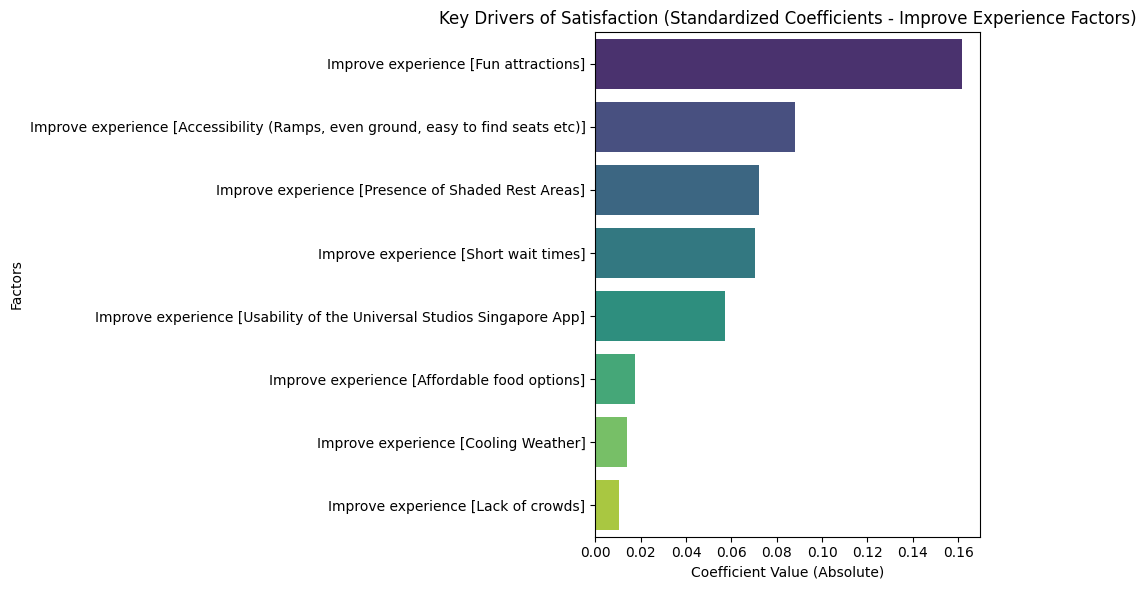

In [10]:
target = 'Rating experience'
predictors = [
    "Improve experience [Short wait times]",
    "Improve experience [Lack of crowds]",
    "Improve experience [Fun attractions]",
    "Improve experience [Affordable food options]",
    "Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]",
    "Improve experience [Cooling Weather]",
    "Improve experience [Presence of Shaded Rest Areas]",
    "Improve experience [Usability of the Universal Studios Singapore App]",

]

X = data[predictors]
y = data[target]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

coefficients = model.params[1:]
coefficients = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.values, y=coefficients.index, palette='viridis')
plt.title('Key Drivers of Satisfaction (Standardized Coefficients - Improve Experience Factors)')
plt.xlabel('Coefficient Value (Absolute)')
plt.ylabel('Factors')
plt.tight_layout()
plt.show()

KEY DRIVERS OF DISSATISFACTION


                            OLS Regression Results                            
Dep. Variable:      Rating experience   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          4.23e-276
Time:                        15:49:21   Log-Likelihood:                -8524.9
No. Observations:                9959   AIC:                         1.707e+04
Df Residuals:                    9950   BIC:                         1.713e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

<ipython-input-11-b91c8a69a498>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette='viridis')


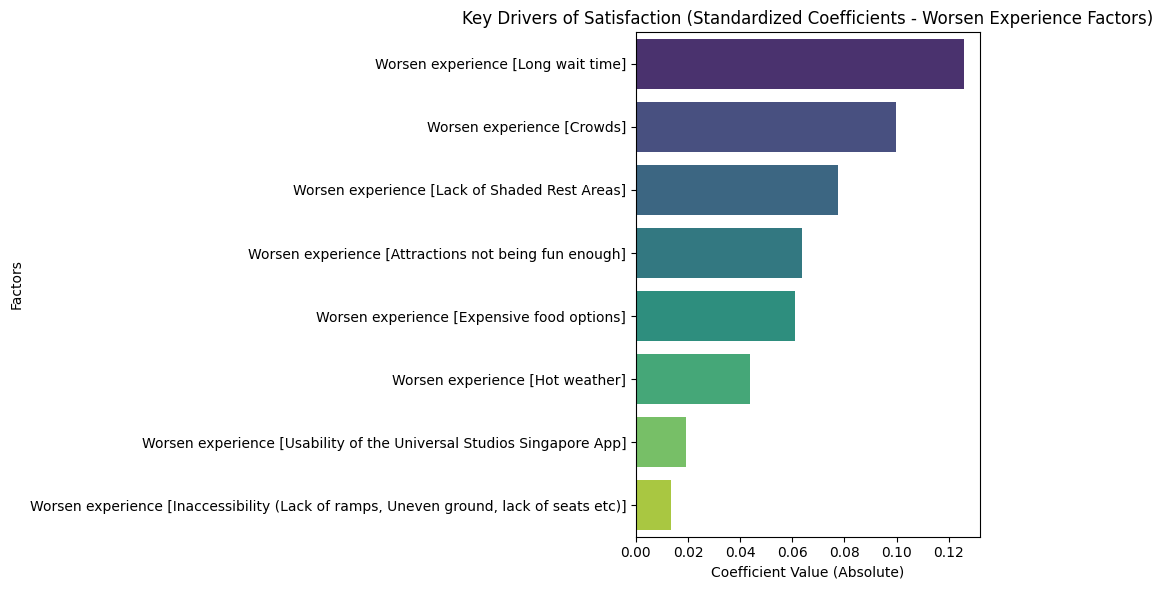

In [11]:
target = 'Rating experience'
predictors = [
'Worsen experience [Long wait time]',
    'Worsen experience [Crowds]',
    'Worsen experience [Attractions not being fun enough]',
    'Worsen experience [Expensive food options]',
    'Worsen experience [Inaccessibility (Lack of ramps, Uneven ground, lack of seats etc)]',
    'Worsen experience [Hot weather]',
    'Worsen experience [Lack of Shaded Rest Areas]',
    'Worsen experience [Usability of the Universal Studios Singapore App]'

]

X = data[predictors]
y = data[target]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


print(model.summary())

coefficients = model.params[1:]
coefficients = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.values, y=coefficients.index, palette='viridis')
plt.title('Key Drivers of Dissatisfaction (Standardized Coefficients - Worsen Experience Factors)')
plt.xlabel('Coefficient Value (Absolute)')
plt.ylabel('Factors')
plt.tight_layout()
plt.show()